# Pre-PCA 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
## data acquisition 
## Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/Users/zeinebouerghi/Downloads/duolingodata.csv.gz")
dataframe.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [4]:
#Data Cleaning and Manipulation 
#adding variables 
#adding number of mistakes made 
dataframe['mistakes'] = dataframe.history_seen - dataframe.history_correct
dataframe['session_mistakes'] = dataframe.session_seen - dataframe.session_correct
dataframe['rate_of_error_per_session'] = dataframe.session_mistakes/dataframe.session_seen
dataframe['general_rate_of_error'] = dataframe.mistakes/dataframe.history_seen 
# unit='s' to convert it into epoch time
dataframe['Datetime'] = pd.to_datetime(dataframe['timestamp'], 
                                  unit='s')

In [9]:
data1= dataframe.drop(['timestamp', 'user_id', 'learning_language', 'ui_language','lexeme_id', 'lexeme_string', 'Datetime'], axis =1 )

In [22]:
data1.cov()

,p_recall,delta,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error
p_recall,0.073661,-1.842634e+04,-7.998090e-01,-3.903015e-01,0.015296,0.108020,-4.095076e-01,-0.092724,-0.073661,-0.003921
delta,-18426.337785,5.046758e+12,-8.842201e+06,-7.600733e+06,6631.974851,-20540.070110,-1.241468e+06,27172.044961,18426.337785,-6021.417447
history_seen,-0.799809,-8.842201e+06,1.678342e+04,1.429734e+04,0.510853,-0.754638,2.486077e+03,1.265491,0.799809,0.445737
history_correct,-0.390301,-7.600733e+06,1.429734e+04,1.253685e+04,0.552501,-0.060048,1.760489e+03,0.612549,0.390301,0.079247
session_seen,0.015296,6.631975e+03,5.108532e-01,5.525007e-01,1.850089,1.709149,-4.164748e-02,0.140940,-0.015296,0.010402
session_correct,0.108020,-2.054007e+04,-7.546377e-01,-6.004840e-02,1.709149,1.739217,-6.945893e-01,-0.030069,-0.108020,0.003395
mistakes,-0.409508,-1.241468e+06,2.486077e+03,1.760489e+03,-0.041647,-0.694589,7.255875e+02,0.652942,0.409508,0.366490
session_mistakes,-0.092724,2.717204e+04,1.265491e+00,6.125491e-01,0.140940,-0.030069,6.529418e-01,0.171009,0.092724,0.007007
rate_of_error_per_session,-0.073661,1.842634e+04,7.998090e-01,3.903015e-01,-0.015296,-0.108020,4.095076e-01,0.092724,0.073661,0.003921
general_rate_of_error,-0.003921,-6.021417e+03,4.457370e-01,7.924699e-02,0.010402,0.003395,3.664900e-01,0.007007,0.003921,0.018584


# Standardizing the Dataset 
Standardizing every value in the dataset to ensure that the features are normally distributed to enable comparaison to other features. 

In [10]:
pca = PCA(data1, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

# Finding Covariance 
We need to investigate teh covariance calculation in order to find relationships between the dimensionsions 

In [11]:
# Covariance Matrix
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), 
columns=data1.columns)


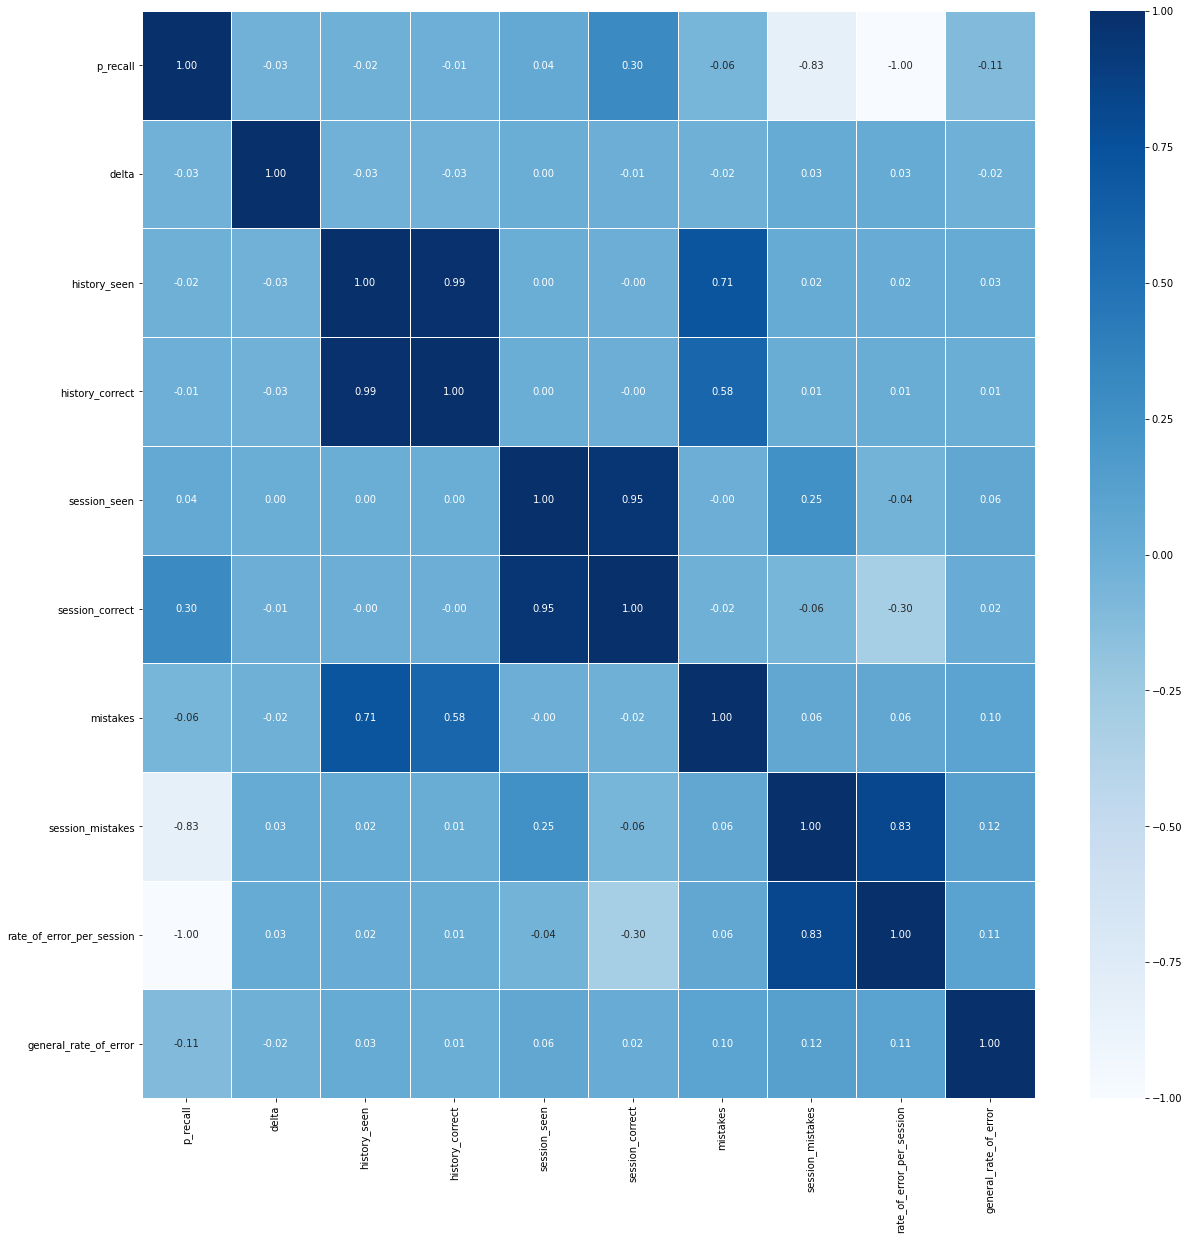

In [12]:
# Plot Covariance Matrix
plt.subplots(figsize=(20, 20))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', 
yticklabels=data1.columns)
plt.show()

# Looking a the correlation between the features and principal components

In [15]:
components_df = pca.factors
combined_df = pd.concat([data1, components_df], axis=1)
correlation = combined_df.corr()

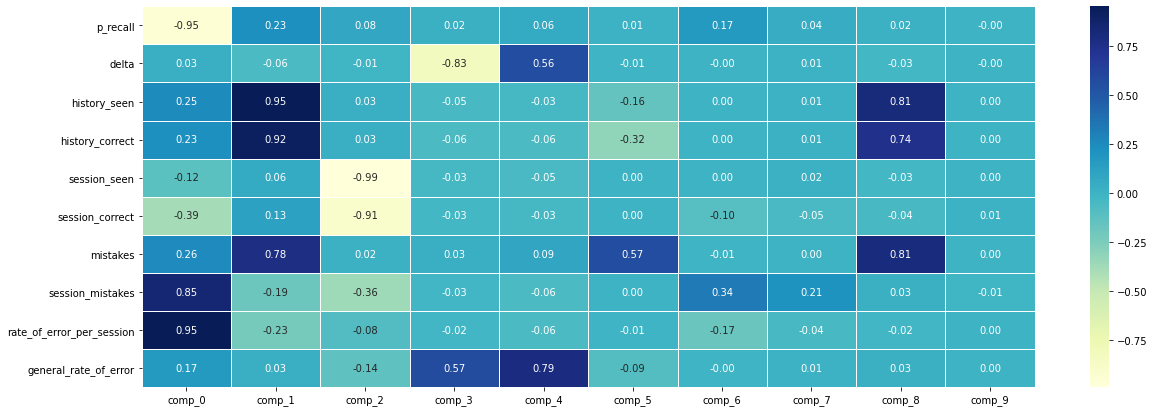

In [17]:
# This matrix will have the correlation between:
# We're removing part of the output to keep only the correlation between features and principal components
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_0':]

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In the above correlation matrix, Component  comp_1 has the highest correlation values. 
- comp_1, history_seen, history_correct, and mistakes have the highest correlation in the above heat map 
- comp_8 , history_seen, history_correct, and mistakes have the second highest correlation 

# Sorting the eigenvalues (PCs) in a descending order based on their strength

In [18]:
pca = PCA(data1, standardize=True, method='eig')
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])
print(eigen_values)

     eigenvalue
0  3.734725e+07
1  3.233106e+07
2  2.526788e+07
3  1.301900e+07
4  1.239722e+07
5  5.840831e+06
6  2.339020e+06
7  1.953730e-07
8  1.473994e-07
9  2.533284e-08


# Choosing the k eigenvectors 

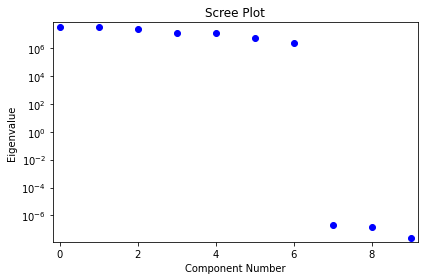

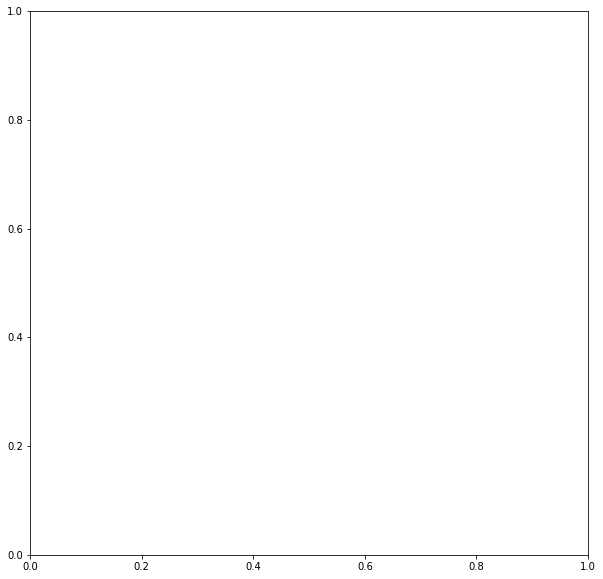

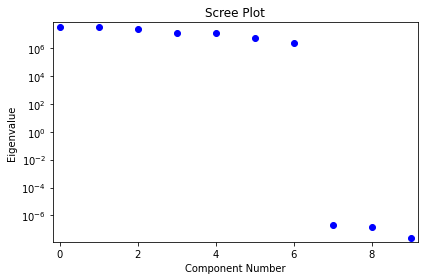

In [23]:
pca = PCA(data1, standardize=True, method='eig')
plt.subplots(figsize=(10, 10))
pca.plot_scree()

Scree plot displays how much variation each principal component captures from the data.